In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as slm
import sklearn.model_selection as sms
import sklearn.svm as svm
from numpy import set_printoptions
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [39]:
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names = names)
data.head()
pd.set_option('display.precision',3)
print(data.head(10))
set_printoptions(precision = 3)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


3.	Сохраните в переменную array значения признаков, обратившись к атрибуту values.

In [40]:
array = data.values

Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y. Прокомментируйте содержимое переменных X и Y.

In [41]:
X = array[:, 1:]
Y = array[:, 0]

print("X:", X.shape)
print("Y:", Y.shape)

X: (768, 8)
Y: (768,)


В качестве Y результативного фактора был выбран диагноз (1 столбец), а Х оставшиеся признаки в качестве факторныхх признаков

5.	Задайте разбиение на фолды с помощью функции KFold(n_splits= n_splits, random_state = random_state, shuffle=True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки, задав параметр shuffle=True.

In [42]:
kfold = sms.KFold(n_splits=10, random_state=7, shuffle=True)

6.	В переменную scoring запишите название метрики качества, которую Вы будете использовать для оценки качества моделей. Пусть это будет средняя квадратичная оценка, взятая с отрицательным знаком, - 'neg_mean_squared_error'.

In [43]:
scoring = 'neg_mean_squared_error'

7.	Постройте модель ближайшего соседа, воспользовавшись функцией KNeighborsRegressor() из модуля sklearn.neighbors. Результат запишите в переменную model.

In [44]:
NeigborsRegressor_model = KNeighborsRegressor()

8.	Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. Результат запишите в переменную results.  

In [45]:
NR_results = sms.cross_val_score(NeigborsRegressor_model, X, Y, cv=kfold, scoring=scoring)

9.	Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.

In [46]:
print ("Среднее", np.mean(-NR_results))
print ("Стандартное отклоение", np.std(NR_results))

Среднее 9.229837320574163
Стандартное отклоение 2.1915621512778807


10.	Постройте модель решающего дерева, воспользовавшись функцией DecisionTreeRegressor() из модуля sklearn.tree. Результат запишите в переменную model.

In [47]:
Tree_model = DecisionTreeRegressor()

11.	Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. Результат запишите в переменную results.  

In [48]:
Tree_results = sms.cross_val_score(Tree_model, X, Y, cv=kfold, scoring=scoring)

12.	Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.

In [49]:
print ("Среднее", np.mean(-Tree_results))
print ("Стандартное отклоение", np.std(Tree_results))

Среднее 14.43238209159262
Стандартное отклоение 3.969017496350916


13.	Постройте модель опорных векторов, воспользовавшись функцией SVR(gamma='auto') из модуля sklearn.svm. Результат запишите в переменную model.

In [50]:
SVR_model = svm.SVR()

14.	Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. Результат запишите в переменную results.  

In [51]:
SVR_results = sms.cross_val_score(SVR_model, X, Y, cv=kfold, scoring=scoring)

15.	Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.

In [52]:
print ("Среднее", np.mean(-SVR_results))
print ("Стандартное отклоение", np.std(SVR_results))

Среднее 9.011101055301463
Стандартное отклоение 1.9981505909445634


16.	Создайте пустой список и запишите его в переменную models.

In [53]:
models = []

17.	Добавьте с помощью функции append() в список models набор из кортежей, первый элемент которого содержит название модели, а второй – функцию для создания соответствующей модели. Включите все линейные и нелинейные модели для регрессии, рассмотренные в заданиях 10 и 11. Можно при этом воспользоваться следующими сокращениями:

In [54]:
models.append(('LinRegr', slm.LinearRegression()))
models.append(('Ridge', slm.Ridge()))
models.append(('Lasso', slm.Lasso()))
models.append(('ElasticNet', slm.ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('DTree', DecisionTreeRegressor()))
models.append(('SVM', svm.SVR()))

18.	Создайте пустые списки results и names.

In [55]:
results = []
names = []

19.	Задайте критерий оценки качества моделей регрессии в переменной scoring. Пусть – средняя квадратичная оценка, взятая с отрицательным знаком, - 'neg_mean_squared_error'.

20.	С помощью функции for, обращаясь к имени и объекту модели, которые содержатся в кортежах списка models, выполните следующее:

In [56]:
for name, model in models:
    kfold = sms.KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = sms.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"Модель: {name}, MSE: {-cv_results.mean()}, Стандартное отклонение: {cv_results.std()}")

Модель: LinRegr, MSE: 7.939163188094737, Стандартное отклонение: 1.576475862181222
Модель: Ridge, MSE: 7.9388152473202975, Стандартное отклонение: 1.5761975389075644
Модель: Lasso, MSE: 8.034223742985745, Стандартное отклонение: 1.5860109644561335
Модель: ElasticNet, MSE: 8.049723481718946, Стандартное отклонение: 1.5768282057912955
Модель: KNN, MSE: 9.229837320574163, Стандартное отклонение: 2.1915621512778807
Модель: DTree, MSE: 13.953332194121668, Стандартное отклонение: 3.463071995499233
Модель: SVM, MSE: 9.011101055301463, Стандартное отклонение: 1.9981505909445634


21.	Изобразите результаты предыдущих расчетов в виде ящика с усами, воспользовавшись следующими функциями из модуля matplotlib.pyplot: figure(), suptitle(), add_subplot(111), boxplot(), set_xticklabels(), show().

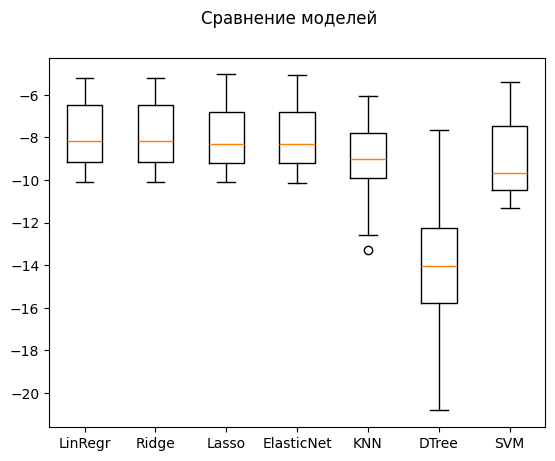

In [57]:
fig = plt.figure()
fig.suptitle('Сравнение моделей')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Выберите лучшую модель. Обоснуйте свой выбор

Я бы выбирала между стандартной линейной регрессией и гребневой, но у гребневой есть выбросы, так что лучше не надо. А у всех остальных больше вероятность ошибки.

23.	Создайте пустой список в переменной estimators

In [58]:
estimators = []

24.	Добавьте в него кортеж, в котором содержится название операции подготовки данных, пусть стандартизация ('standardize'), и соответствующая функция StandardScaler() из модуля sklearn.preprocessing

In [59]:
estimators.append(('standardize', StandardScaler()))

25.	Также добавьте в список кортеж с названием лучшей модели для регрессии, выбранной в п. 20, и соответствующую ей функцию.

In [60]:
estimators.append(('LinRegr', slm.LinearRegression()))

26.	На основе созданного списка создайте программный конвеер с помощью функции Pipeline() из модуля sklearn.pipeline. Результат запишите в переменную model.

In [61]:
model_Pipeline = Pipeline(estimators)

27.	Задайте разбиение на фолды с помощью функции KFold(n_splits = n_splits, random_state = random_state, shuffle = True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки, задав параметр shuffle=True.

In [62]:
kfold = sms.KFold(n_splits=10, random_state=7, shuffle=True)

28.	Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold, scoring=scoring) из модуля sklearn.model_selection. На вход подайте созданный программный конвеер. Результат запишите в переменную results.

In [63]:
Pipeline_results = sms.cross_val_score(model_Pipeline, X, Y, cv=kfold, scoring=scoring)

29.	Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.

In [64]:
print ("Среднее", np.mean(-Pipeline_results))
print ("Стандартное отклоение", np.std(Pipeline_results))

Среднее 7.939163188094739
Стандартное отклоение 1.5764758621812205


30.	Сделайте вывод о целесообразности создания программного конвеера.

Либо я ошиблась либо смысла 0. Результаты для линейной регресии без программного контейнера идентичные

31.	Создайте пустой список в переменной features. В нем в дальнейшем будут содержаться отобранные признаки.

In [65]:
features = []

32.	С помощью функции append() добавьте в него кортеж, в котором содержится название метода главных компонент ('pca') и соответствующая функция PCA(n_components=4) из модуля sklearn.decomposition.

In [66]:
features.append(('pca', PCA(n_components=4)))

33.	Также добавьте в список кортеж с названием 'select_best' и соответствующую ей функцию SelectKBest(k=6) из модуля sklearn.feature_selection для отбора 6 лучших признаков.

In [67]:
features.append(('select_best', SelectKBest(k=6)))

34.	На основе созданного списка создайте программный конвеер для отбора признаков с помощью функции FeatureUnion() из модуля sklearn.pipeline. Результат запишите в переменную feature_union.

In [68]:
feature_union = FeatureUnion(features)

35.	Создайте пустой список в переменной estimators.

In [69]:
estimators_2 = []

36.	С помощью функции append() добавьте в него кортеж, в котором содержится название 'feature_union' и созданный ранее конвеер для отбора признаков.

In [70]:
estimators_2.append(('feature_union', feature_union))

37.	Также добавьте в список кортеж с названием линейной регрессии ('LinRegr') и соответствующую ей функцию LinearRegression().

In [71]:
estimators_2.append(('LinRegr', slm.LinearRegression()))

38.	На основе созданного списка создайте программный конвеер с помощью функции Pipeline() из модуля sklearn.pipeline. Результат запишите в переменную model.

In [72]:
model_Pipeline_2 = Pipeline(estimators_2)

40.	Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv = kfold, scoring = scoring)  из модуля sklearn.model_selection. На вход подайте созданный программный конвеер. Результат запишите в переменную results.

In [73]:
Pipeline_results_2 = sms.cross_val_score(model_Pipeline_2, X, Y, cv=kfold, scoring=scoring)

41.	Выведите на экран среднюю величину средней квадратичной ошибки (MSE), взятую с отрицательным знаком, и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std(). Прокомментируйте полученный результат.

In [74]:
print ("Среднее", np.mean(-Pipeline_results_2))
print ("Стандартное отклоение", np.std(Pipeline_results_2))

Среднее 7.939163188094605
Стандартное отклоение 1.5764758621821158
